In [1]:
#Loading files
import re
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml

with open("books.yaml", "r") as f:
    yaml_data = yaml.safe_load(f)

cleaned_yaml = [{k.lstrip(":"): v for k, v in row.items()} for row in yaml_data]
df_books = pd.DataFrame(cleaned_yaml)

df_orders = pd.read_parquet("orders.parquet")

df_users = pd.read_csv("users.csv")

In [2]:
print("Books:")
df_books.head(5)

Books:


,id,title,author,genre,publisher,year
0,19199,The Yellow Meads of Asphodel,Carolyne West,Classic,Mainstream Publishing,2009
1,19398,From Here to Eternity,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story,Vintage Books,2001
2,19483,Eyeless in Gaza,Vannessa Price,Biography/Autobiography,Pavilion Books,1886
3,19506,Precious Bane,Miss Yong Wyman,Realistic fiction,New English Library,2021
4,19570,City of God,Travis Moore,Suspense/Thriller,Bellevue Literary Press,1847


In [3]:
print("\nOrders:")
df_orders.head(5)


Orders:


,id,user_id,book_id,quantity,unit_price,timestamp,shipping
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599"
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None


In [4]:
print("\nUsers:")
df_users.head(5)


Users:


,id,name,address,phone,email
0,44533,Hoyt Carter,"Apt. 300 8604 Ashlyn Wells, Effertzstad, ID 02997",(462) 385-4294,mckinley.rowe@harber.example
1,46128,Marco Kulas,"Apt. 538 816 Bechtelar Ferry, Lincolnhaven, KS...",913.466.4487,francisco@murray-cronin.test
2,46407,Denny Goyette LLD,"Apt. 174 39450 Mohr Rapids, Port Neomistad, AL...",(801) 970-3335,marguerita@wuckert.test
3,44602,Zackary Heller,"Apt. 608 74228 Bogan Valley, South Stepanieshi...",895.829.5417,annabelle@hessel.test
4,45828,Jess Beier,"2716 Jacobi Path, Ziemanntown, SC 65624-4660",(113) 784-3410,minh@hettinger.example


In [5]:
print("Books info:")
print(df_books.info(), "\n")

print("Orders info:")
print(df_orders.info(), "\n")

print("Users info:")
print(df_users.info(), "\n")

print("Null values in Books:")
print(df_books.isna().sum(), "\n")

print("Null values in Orders:")
print(df_orders.isna().sum(), "\n")

print("Null values in Users:")
print(df_users.isna().sum(), "\n")


Books info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         753 non-null    int64 
 1   title      753 non-null    object
 2   author     753 non-null    object
 3   genre      753 non-null    object
 4   publisher  751 non-null    object
 5   year       751 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.4+ KB
None 

Orders info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11237 entries, 0 to 11236
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11237 non-null  int64 
 1   user_id     11237 non-null  int64 
 2   book_id     11237 non-null  int64 
 3   quantity    11237 non-null  int32 
 4   unit_price  11237 non-null  object
 5   timestamp   11237 non-null  object
 6   shipping    8427 non-null   object
dtypes: int32(1), int64(3), objec

In [6]:
#Data Cleaning for books.yaml
df_books["publisher"] = df_books["publisher"].fillna("unknown_publisher")

df_books["year"] = df_books["year"].fillna("unknown_year")

In [7]:
#Data Cleaning for users.csv
df_users["address"] = (
    df_users["address"]
    .replace(r"^\s*$", np.nan, regex=True)
    .fillna("unknown_address")
)

def normalize_phone(raw):
    if pd.isna(raw):
        return np.nan
    raw_str = str(raw).strip()
    digits = re.sub(r"\D", "", raw_str)
    return digits or np.nan

df_users["phone_norm"] = df_users["phone"].apply(normalize_phone)

In [8]:
# Checking data formats in orders.parquet
candidate_formats = [
    "%Y-%m-%d",
    "%Y-%m-%d %H:%M:%S",
    "%Y-%m-%d %H:%M",
    "%d.%m.%Y",
    "%d.%m.%Y %H:%M:%S",
    "%d/%m/%Y",
    "%d-%m-%Y",
    "%Y/%m/%d",
    "%Y-%m-%d,%H:%M",
    "%Y-%m-%d,%H:%M:%S",
    "%Y-%m-%d,%I:%M:%S %p",
    "%Y-%m-%dT%H:%M:%S",
    "%Y-%m-%dT%H:%M:%S.%f",
    "%d-%b-%Y,%H:%M",
    "%d-%b-%Y,%H:%M:%S",
    "%d-%b-%Y,%I:%M:%S %p",
    "%d-%B-%Y,%H:%M",
    "%d-%B-%Y,%H:%M:%S",
    "%d-%B-%Y,%I:%M:%S %p",
    "%H:%M,%Y-%m-%d",
    "%H:%M:%S,%Y-%m-%d",
    "%H:%M,%d-%b-%Y",
    "%H:%M:%S,%d-%b-%Y",
    "%H:%M,%d-%B-%Y",
    "%H:%M:%S,%d-%B-%Y",
    "%m/%d/%y,%H:%M",
    "%m/%d/%y,%H:%M:%S",
    "%m/%d/%y,%I:%M:%S %p",
    "%H:%M,%m/%d/%y",
    "%H:%M:%S,%m/%d/%y",
    "%Y-%m-%d %I:%M:%S %p",
    "%m/%d/%y %I:%M:%S %p",
    "%d-%b-%Y %H:%M",
    "%d-%b-%Y %H:%M:%S",
    "%d-%B-%Y %H:%M",
    "%d-%B-%Y %H:%M:%S",
    "%H:%M %Y-%m-%d",
    "%H:%M:%S %Y-%m-%d",
    "%H:%M %m/%d/%y",
    "%H:%M:%S %m/%d/%y",
    "%H:%M:%S %p,%d-%B-%Y",
    "%H:%M:%S %p %d-%B-%Y",
    "%H:%M:%S %p,%d-%b-%Y",
    "%H:%M:%S %p %d-%b-%Y",
    "%H:%M:%S %p,%Y-%m-%d",
    "%H:%M:%S %p %Y-%m-%d",
    "%H:%M:%S %p,%m/%d/%y",
    "%H:%M:%S %p %m/%d/%y",
    "%H:%M %d-%b-%Y",
    "%H:%M %d-%B-%Y",
    "%a %b %d %H:%M:%S %Y",
    "%m/%d/%y %H:%M",
    "%m/%d/%y %H:%M:%S",
    "%H:%M:%S %d-%b-%Y",
    "%H:%M:%S %d-%B-%Y",
    "%d-%b-%Y %I:%M:%S %p",
    "%d-%B-%Y %I:%M:%S %p",
]

def normalize_ts(s: str) -> str:
    s = s.strip()

    s = re.sub(
        r'\b([APap])[.\s]*M[.\s]*(?=\s|,|;|$)',
        lambda m: m.group(1).upper() + "M",
        s,
    )

    s = re.sub(
        r'\b([APap])[mM](?=\s|,|;|$)',
        lambda m: m.group(1).upper() + "M",
        s,
    )

    s = s.replace(";", ",")
    s = re.sub(r'\s+', ' ', s)
    s = re.sub(r',\s+', ',', s)

    return s

formats = []
seen_formats = set()
unmatched = []

for raw_ts in df_orders["timestamp"].astype(str):
    ts_norm = normalize_ts(raw_ts)

    for fmt in candidate_formats:
        try:
            datetime.strptime(ts_norm, fmt)
            if fmt not in seen_formats:
                seen_formats.add(fmt)
                formats.append(fmt)
            break
        except ValueError:
            continue
    else:
        unmatched.append(raw_ts)

print("Found data format (list 'formats'):")
for f in formats:
    print("  ", f)

print("\nUnparsed timestamps (first 20):")
for v in unmatched[:20]:
    print("  ", v)

Found data format (list 'formats'):
   %m/%d/%y %I:%M:%S %p
   %H:%M,%d-%b-%Y
   %H:%M:%S,%Y-%m-%d
   %Y-%m-%d %H:%M:%S
   %H:%M:%S %p,%d-%B-%Y
   %H:%M:%S %m/%d/%y
   %d-%b-%Y,%H:%M
   %H:%M:%S %p %d-%B-%Y
   %d-%b-%Y,%I:%M:%S %p
   %H:%M:%S,%m/%d/%y
   %H:%M,%m/%d/%y
   %Y-%m-%d %H:%M
   %Y-%m-%dT%H:%M:%S.%f
   %H:%M:%S %p,%Y-%m-%d
   %d-%b-%Y,%H:%M:%S
   %H:%M:%S %p %m/%d/%y
   %m/%d/%y,%H:%M:%S
   %H:%M:%S %Y-%m-%d
   %H:%M,%Y-%m-%d
   %Y-%m-%d,%H:%M
   %Y-%m-%dT%H:%M:%S
   %Y-%m-%d,%H:%M:%S
   %d-%b-%Y %H:%M
   %H:%M %Y-%m-%d
   %m/%d/%y,%I:%M:%S %p
   %H:%M:%S %p,%d-%b-%Y
   %H:%M %d-%b-%Y
   %H:%M:%S %p,%m/%d/%y
   %d-%B-%Y,%H:%M:%S
   %d-%B-%Y,%H:%M
   %H:%M:%S,%d-%b-%Y
   %d.%m.%Y %H:%M:%S
   %H:%M,%d-%B-%Y
   %m/%d/%y,%H:%M
   %a %b %d %H:%M:%S %Y
   %d-%b-%Y %H:%M:%S
   %Y-%m-%d,%I:%M:%S %p
   %H:%M:%S %p %d-%b-%Y
   %H:%M %m/%d/%y
   %Y-%m-%d %I:%M:%S %p
   %d-%B-%Y %H:%M:%S
   %m/%d/%y %H:%M
   %H:%M:%S,%d-%B-%Y
   %m/%d/%y %H:%M:%S
   %H:%M:%S %d-%b-%Y
   %d-%B-%Y,%I:%M:%

In [9]:
# Date Cleaning for orders.parquet
def clean_timestamp_str(s):
    if pd.isna(s):
        return None
    
    s = str(s).strip()
    s = s.replace(";", ",")

    s = re.sub(
        r'\b([APap])[.\s]*M[.\s]*(?=\s|,|;|$)',
        lambda m: m.group(1).upper() + "M",
        s,
    )

    s = re.sub(
        r'\b([APap])[mM](?=\s|,|;|$)',
        lambda m: m.group(1).upper() + "M",
        s,
    )

    s = re.sub(r'\s+', ' ', s)
    s = re.sub(r',\s+', ',', s)

    return s


def parse_multi(s):
    s = clean_timestamp_str(s)
    if not s:
        return pd.NaT
    for fmt in formats:
        try:
            return datetime.strptime(s, fmt)
        except ValueError:
            continue
    try:
        return pd.to_datetime(s, errors="coerce", utc=False)
    except Exception:
        return pd.NaT

df_orders["timestamp_parsed"] = (
    df_orders["timestamp"]
    .apply(parse_multi)
    .pipe(pd.to_datetime, errors="coerce")
    .dt.floor("s")
)

In [10]:
# Checking parsed dates
total = len(df_orders)
bad = df_orders["timestamp_parsed"].isna().sum()
print("All records:", total)
print("Unparsed dates:", bad)
print("Share unparsed:", round(bad / total, 3))
print("Sample bad values:")
print(df_orders.loc[df_orders["timestamp_parsed"].isna(), "timestamp"].unique()[:20])

print("Min date:", df_orders["timestamp_parsed"].min())
print("Max date:", df_orders["timestamp_parsed"].max())

print("Date type:", df_orders["timestamp_parsed"].dtype)

All records: 11237
Unparsed dates: 0
Share unparsed: 0.0
Sample bad values:
[]
Min date: 2024-01-08 14:17:00
Max date: 2025-11-09 02:42:15
Date type: datetime64[ns]


In [11]:
#Checking values for shipping
shipping_raw = df_orders["shipping"].astype(str).str.strip()

print("Sample unique values:")
print(shipping_raw.unique()[:10])

print("Value counts (top 5):")
print(shipping_raw.value_counts().head(5))

Sample unique values:
['None' '4940 Arnoldo Keys, West Arnette, KS 77599' ''
 'Suite 161 84822 Volkman Gateway, Luketon, LA 46335' 'NULL'
 '72116 Guy Inlet, West Dionton, WA 64694'
 'Apt. 906 66777 Doyle Islands, Donettatown, MD 67566'
 '939 Colby Square, Boganbury, AL 07963'
 'Suite 719 168 Bayer Land, Lake Jaimie, CO 89572-5698'
 'Apt. 264 3599 Balistreri Turnpike, West Luigistad, MT 75332']
Value counts (top 5):
shipping
                                                   2830
None                                               2810
NULL                                               2776
1910 Pollich Skyway, Charleyberg, MS 29517-1132       7
99554 Legros Circle, North Lovettaton, HI 70352       7
Name: count, dtype: int64


In [12]:
# Clean up shipping values
empty_tokens = {"", "None", "NULL", "null", "none"}

df_orders["shipping"] = (
    df_orders["shipping"]
    .astype(str)
    .str.strip()
    .replace({val: np.nan for val in empty_tokens})
)

print("NaN in shipping:", df_orders["shipping"].isna().sum())
print("Example non-null values:")
print(df_orders.loc[df_orders["shipping"].notna(), "shipping"].unique()[:20])

NaN in shipping: 8416
Example non-null values:
['4940 Arnoldo Keys, West Arnette, KS 77599'
 'Suite 161 84822 Volkman Gateway, Luketon, LA 46335'
 '72116 Guy Inlet, West Dionton, WA 64694'
 'Apt. 906 66777 Doyle Islands, Donettatown, MD 67566'
 '939 Colby Square, Boganbury, AL 07963'
 'Suite 719 168 Bayer Land, Lake Jaimie, CO 89572-5698'
 'Apt. 264 3599 Balistreri Turnpike, West Luigistad, MT 75332'
 '418 Tempie Mills, Rowemouth, WA 72824-4137'
 'Apt. 928 289 Oleta Course, Jannietown, AR 98094-3397'
 'Suite 277 5242 Blick Glens, New Breanaton, HI 59699-1995'
 '3570 Kulas Track, New Carie, WA 37270-0647'
 '7640 Reichel Island, Swaniawskichester, VA 38440-8395'
 '9556 Wilber Lights, North Jerrodhaven, MN 46135-2278'
 'Apt. 490 3379 Griselda Plains, Lake Lenstad, SD 14094-0246'
 'Suite 242 7639 Dania Cape, Michalebury, RI 33128'
 'Suite 175 882 Collette Summit, North Averyburgh, PA 38143-4918'
 '47931 Botsford Meadow, West Nan, GA 47842-9623'
 '86663 Kyle Extensions, Paucekmouth, IN 3652

In [13]:
# Parsing prices in orders.parquet

df_orders["unit_price_raw"] = df_orders["unit_price"].astype(str)

df_orders["currency"] = np.where(
    df_orders["unit_price_raw"].str.contains("€|EUR", case=False, na=False),
    "EUR",
    "USD"
)

def parse_price(text: str) -> float:
    s = str(text).strip()

    nums = re.findall(r"\d+", s)

    if ("¢" in s or "$" in s) and "." not in s and len(nums) >= 2:
        dollars = int(nums[0])
        cents = int(nums[1])
        return dollars + cents / 100

    cleaned = re.sub(r"[^\d.]", "", s)
    if cleaned == "":
        return np.nan

    try:
        return float(cleaned)
    except ValueError:
        return np.nan

df_orders["unit_price"] = df_orders["unit_price_raw"].apply(parse_price)

In [14]:
# Change EURO to USD in df_orders
eur_to_usd = 1.2

df_orders["unit_price"] = np.where(
    df_orders["currency"] == "EUR",
    df_orders["unit_price"] * eur_to_usd,
    df_orders["unit_price"]
)

In [15]:
# Add column paid_price in df_orders
df_orders["paid_price"] = df_orders["quantity"] * df_orders["unit_price"]

In [16]:
# Add date column in df_orders

df_orders["date"] = df_orders["timestamp_parsed"].dt.date

df_orders["date"] = pd.to_datetime(
    df_orders["date"],
    format="%Y-%m-%d",
    errors="coerce"
)

In [17]:
# 1. Compute daily revenue (sum of paid_price grouped by date) and find top 5 days by revenue.
daily_revenue = df_orders.groupby("date")["paid_price"].sum().reset_index()
top_5_days = daily_revenue.sort_values(by="paid_price", ascending=False).head(5)

In [18]:
# 2. Find how many real unique users there are. Note that user can change address or change phone or even provide alias instead of a real name;
# you need to reconciliate data. You may assume that only one field is changed.

df_clean = df_users.copy().reset_index(drop=True)

cols = ["name", "address", "phone_norm", "email"]
for c in cols:
    df_clean[c] = df_clean[c].astype(str).str.strip().str.lower()

df_clean["k1"] = df_clean["name"]    + "|" + df_clean["address"]    + "|" + df_clean["phone_norm"]
df_clean["k2"] = df_clean["name"]    + "|" + df_clean["address"]    + "|" + df_clean["email"]
df_clean["k3"] = df_clean["name"]    + "|" + df_clean["phone_norm"] + "|" + df_clean["email"]
df_clean["k4"] = df_clean["address"] + "|" + df_clean["phone_norm"] + "|" + df_clean["email"]

n = len(df_clean)
parent = np.arange(n)

def find(x):
    if parent[x] != x:
        parent[x] = find(parent[x])
    return parent[x]

def union(a, b):
    ra, rb = find(a), find(b)
    if ra != rb:
        parent[rb] = ra

key_cols = ["k1", "k2", "k3", "k4"]

for col in key_cols:
    for key, group in df_clean.groupby(col):
        idx = group.index.to_list()
        if len(idx) > 1:
            first = idx[0]
            for i in idx[1:]:
                union(first, i)

roots = np.array([find(i) for i in range(n)])

df_users["global_id"] = pd.factorize(roots)[0]
num_unique_users = len(df_users["global_id"].unique())


print("All records:", len(df_users))
print("Unique users:", num_unique_users)

All records: 3293
Unique users: 3115


In [19]:
# 3. Find how how many unique sets of authors there are.
# For example, if John and Paul wrote a book together and wrote several books separately, it means that there are 3 different sets.
def author_set(s):
    if pd.isna(s):
        return tuple()
    authors = [a.strip() for a in str(s).split(",")]
    authors = [a for a in authors if a]
    return tuple(sorted(set(authors)))

df_books["author_set"] = df_books["author"].apply(author_set)

num_unique_author_sets = df_books["author_set"].nunique()

print("All records:", len(df_books))
print("Unique sets of authors:", num_unique_author_sets)

All records: 753
Unique sets of authors: 325


In [20]:
# 4. Find the most popular (by sold book count) author (or author set).
sales_per_book = (
    df_orders
    .groupby("book_id")["quantity"] 
    .sum()
    .rename("total_sold")
    .reset_index()
)

df_book_sales = df_books.merge(
    sales_per_book,
    left_on="id",
    right_on="book_id",
    how="left"
)

df_book_sales["total_sold"] = df_book_sales["total_sold"].fillna(0)

sales_per_author_set = (
    df_book_sales
    .groupby("author_set", as_index=False)[["total_sold"]]
    .sum()
    .sort_values("total_sold", ascending=False)
)

most_popular_set = sales_per_author_set.head(1)

best_author = most_popular_set["author_set"].iloc[0]
best_sold = most_popular_set["total_sold"].iloc[0]
print("Most popular author set:", best_author)
print("Total sold:", best_sold)

Most popular author set: ('Arlinda Huel',)
Total sold: 201


In [21]:
# 5. Best buyer (with aliases) as an array of ids ([id1, id2, ...])

df_orders_mapped = df_orders.merge(
    df_users[["id", "global_id"]],
    left_on="user_id",
    right_on="id",
    how="left"
)

spend_per_person = (
    df_orders_mapped
    .groupby("global_id")["paid_price"]
    .sum()
    .rename("total_spent")
)

max_spent = spend_per_person.max()

best_global_ids = spend_per_person[spend_per_person == max_spent].index.to_list()

aliases_per_person = (
    df_users
    .groupby("global_id")["id"]
    .apply(lambda s: sorted(set(s)))
)

best_buyer_aliases = {
    gid: aliases_per_person.loc[gid]
    for gid in best_global_ids
}

best_ids_flat = sorted({i for ids in best_buyer_aliases.values() for i in ids})

print("Best buyer global_ids:", best_global_ids)
print("Best buyer aliases:", best_ids_flat)


Best buyer global_ids: [371]
Best buyer aliases: [44850, 45062, 46955]


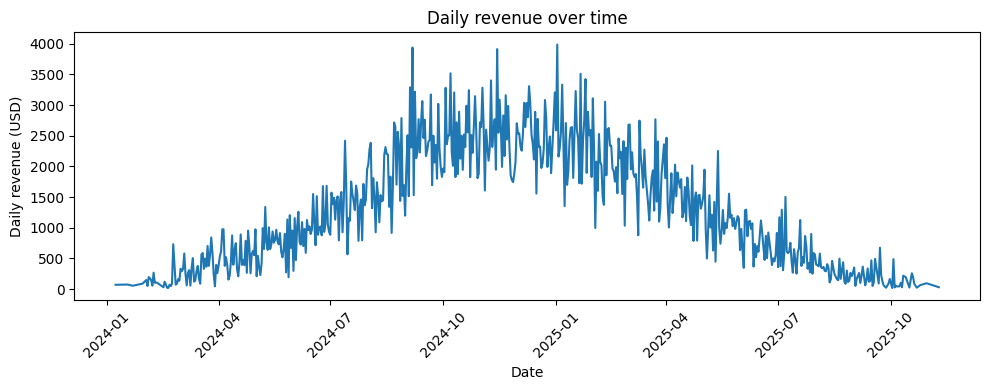

In [22]:
# 6.Plot a simple line chart of daily revenue using matplotlib.
daily_revenue = (
    df_orders
    .groupby("date")["paid_price"]
    .sum()
    .rename("revenue")
    .reset_index()
)

plt.figure(figsize=(10, 4))
plt.plot(daily_revenue["date"], daily_revenue["revenue"])
plt.xlabel("Date")
plt.ylabel("Daily revenue (USD)")
plt.title("Daily revenue over time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("daily_revenue.png", dpi=300)
plt.show()

In [23]:
# Showing all the results

# 1.Top 5 days by revenue (YYYY-MM-dd)
print("Top 5 days by revenue (YYYY-MM-dd):")
print(top_5_days, "\n")

# 2.Number of unique users
print("Number of unique users:")
print("All records:", len(df_users))
print("Unique users:", num_unique_users, "\n")

# 3.Number of unique sets of authors
print("Number of unique sets of authors:")
print("All records:", len(df_books))
print("Unique sets of authors:", num_unique_author_sets, "\n")

# 4.Name of most popular author(s)
print("Most popular author(s), by sold book count:" "\n", best_author, best_sold, "\n")

# 5.Best buyer (with aliases) as an array of ids ([id1, id2, ...])
print("Best buyer id(s):", best_ids_flat)

Top 5 days by revenue (YYYY-MM-dd):
          date  paid_price
335 2025-01-02    3987.048
217 2024-09-06    3937.608
286 2024-11-14    3911.974
248 2024-10-07    3517.018
354 2025-01-21    3509.696 

Number of unique users:
All records: 3293
Unique users: 3115 

Number of unique sets of authors:
All records: 753
Unique sets of authors: 325 

Most popular author(s), by sold book count:
 ('Arlinda Huel',) 201 

Best buyer id(s): [44850, 45062, 46955]


In [24]:
# 1) Top 5 days by revenue
df_top_days = top_5_days.copy()

# 2) Number of unique users
df_unique_users_summary = pd.DataFrame([{
    "all_records": len(df_users),
    "unique_users": num_unique_users,
}])

# 3) Number of unique sets of authors
df_unique_author_sets_summary = pd.DataFrame([{
    "all_records": len(df_books),
    "unique_sets_of_authors": num_unique_author_sets,
}])

# 4) Most popular author(s) – obsługa wielu autorów
if isinstance(best_author, tuple):
    authors = list(best_author)
elif isinstance(best_author, list):
    authors = best_author
else:
    authors = [best_author]

df_top_authors = pd.DataFrame(
    [{"author": a, "sold_book_count": best_sold} for a in authors]
)

# 5) Best buyer id(s)
df_best_buyers = pd.DataFrame({
    "buyer_id": best_ids_flat
})

with pd.ExcelWriter("data_summary_1.xlsx") as writer:
    df_top_days.to_excel(writer, sheet_name="top5_days_by_revenue", index=False)
    df_unique_users_summary.to_excel(writer, sheet_name="unique_users_summary", index=False)
    df_unique_author_sets_summary.to_excel(writer, sheet_name="unique_author_sets_authors", index=False)
    df_top_authors.to_excel(writer, sheet_name="top_authors_by_sold_books", index=False)
    df_best_buyers.to_excel(writer, sheet_name="best_buyer_ids", index=False)